In [25]:
# Import the evprofiler package

from evprofiler.ev import EV, DrivableEV
from evprofiler.trip import Trip, DrivableTrip
from evprofiler.aggregator import Aggregator
from evprofiler.station import ChargingStation
from evprofiler.profile import Profile, Schedule, User

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Create a list of EVs to use in the simulation

EVs = [EV(brand='Nissan', model='Leaf', battery_type='BEV', battery_size=59,
          charging_efficiency=0.9, discharging_efficiency=0.9,
          probability_in_population=0.16, energy_per_km=0.17, soc_min=0.8, soc_max=1.0),
       EV(brand='Tesla', model='Model 3', battery_type='BEV', battery_size=95,
          charging_efficiency=0.9, discharging_efficiency=0.9,
          probability_in_population=0.13, energy_per_km=0.18, soc_min=0.8, soc_max=1.0),
       EV(brand='Peugeot', model='e-Expert', battery_type='BEV', battery_size=68,
          charging_efficiency=0.9, discharging_efficiency=0.9,
          probability_in_population=0.1, energy_per_km=0.26, soc_min=0.8, soc_max=1.0),
       EV(brand='Renault', model='Zoe', battery_type='BEV', battery_size=52,
          charging_efficiency=0.9, discharging_efficiency=0.9,
          probability_in_population=0.1, energy_per_km=0.17, soc_min=0.8, soc_max=1.0),
       EV(brand='Jaguar', model='I-Pace', battery_type='BEV', battery_size=85,
          charging_efficiency=0.9, discharging_efficiency=0.9,
          probability_in_population=0.09, energy_per_km=0.22, soc_min=0.8, soc_max=1.0),
       EV(brand='Mercedes', model='E300', battery_type='PHEV', battery_size=13.5,
          charging_efficiency=0.9, discharging_efficiency=0.9,
          probability_in_population=0.08, energy_per_km=0.18, soc_min=0.8, soc_max=1.0),
       EV(brand='BMW', model='530e', battery_type='PHEV', battery_size=70.2,
          charging_efficiency=0.9, discharging_efficiency=0.9,
          probability_in_population=0.08, energy_per_km=0.16, soc_min=0.8, soc_max=1.0),
       EV(brand='Audi Q4', model='e-tron', battery_type='PHEV', battery_size=55,
          charging_efficiency=0.9, discharging_efficiency=0.9,
          probability_in_population=0.07, energy_per_km=0.17, soc_min=0.8, soc_max=1.0),
       EV(brand='Hyundai', model='Kauai', battery_type='BEV', battery_size=74,
          charging_efficiency=0.9, discharging_efficiency=0.9,
          probability_in_population=0.06, energy_per_km=0.192, soc_min=0.8, soc_max=1.0),
       EV(brand='Volvo', model='XC40', battery_type='PHEV', battery_size=78,
          charging_efficiency=0.9, discharging_efficiency=0.9,
          probability_in_population=0.05, energy_per_km=0.176, soc_min=0.8, soc_max=1.0),
       EV(brand='Wolkswagen', model='ID.3', battery_type='PHEV', battery_size=58,
          charging_efficiency=0.9, discharging_efficiency=0.9,
          probability_in_population=0.05, energy_per_km=0.155, soc_min=0.8, soc_max=1.0),
       EV(brand='Others', model='Others', battery_type='PEV', battery_size=20,
          charging_efficiency=0.9, discharging_efficiency=0.9,
          probability_in_population=0.03, energy_per_km=0.2, soc_min=0.8, soc_max=1.0)]

# Print the sum of the probabilities in the population of EVs
sum_of_probabilities = 0
for ev in EVs:
    sum_of_probabilities += ev.probability_in_population
print(sum_of_probabilities)

1.0


In [3]:
# Create a list of Charging Stations to use in the simulation

PUBLIC_STATIONS = [ChargingStation(charging_station_type='Public Ultrafast (150 kW)',
                                   charging_station_power=150,
                                   charging_station_efficiency=0.9,
                                   charging_station_cost=0.297,
                                   charging_station_probability=0.0233),
                   ChargingStation(charging_station_type='Public Fast (50 kW)',
                                   charging_station_power=50,
                                   charging_station_efficiency=0.9,
                                   charging_station_cost=0.297,
                                   charging_station_probability=0.434),
                   ChargingStation(charging_station_type='Public Semi-fast (22 kW)',
                                   charging_station_power=22,
                                   charging_station_efficiency=0.9,
                                   charging_station_cost=0.297,
                                   charging_station_probability=0.4394),
                   ChargingStation(charging_station_type='Public Slow (7.2 kW)',
                                   charging_station_power=7.2,
                                   charging_station_efficiency=0.9,
                                   charging_station_cost=0.297,
                                   charging_station_probability=0.1033)]

PRIVATE_STATIONS = [ChargingStation(charging_station_type='Private Fast (50 kW)',
                                    charging_station_power=50,
                                    charging_station_efficiency=0.9,
                                    charging_station_cost=0.297,
                                    charging_station_probability=0.0405),
                    ChargingStation(charging_station_type='Private Semi-fast (22 kW)',
                                    charging_station_power=22,
                                    charging_station_efficiency=0.9,
                                    charging_station_cost=0.297,
                                    charging_station_probability=0.9595)]

RESIDENTIAL_CS1 = [ChargingStation(charging_station_type='Residential Slow (3.6 kW)',
                                   charging_station_power=3.6,
                                   charging_station_efficiency=0.9,
                                   charging_station_cost=0.297,
                                   charging_station_probability=0.6),
                   ChargingStation(charging_station_type='Residential Slow (7.2 kW)',
                                   charging_station_power=7.2,
                                   charging_station_efficiency=0.9,
                                   charging_station_cost=0.297,
                                   charging_station_probability=0.4)]

RESIDENTIAL_CS2 = [ChargingStation(charging_station_type='Residential Slow (3.6 kW)',
                                   charging_station_power=3.6,
                                   charging_station_efficiency=0.9,
                                   charging_station_cost=0.297,
                                   charging_station_probability=0.3),
                   ChargingStation(charging_station_type='Residential Slow (7.2 kW)',
                                   charging_station_power=7.2,
                                   charging_station_efficiency=0.9,
                                   charging_station_cost=0.297,
                                   charging_station_probability=0.6),
                   ChargingStation(charging_station_type='Residential Semi-fast (22 kW)',
                                   charging_station_power=22,
                                   charging_station_efficiency=0.9,
                                   charging_station_cost=0.297,
                                   charging_station_probability=0.1)]


In [4]:
# Create the profiles to use in the simulation

# Create a list of profiles
PROFILES = [Profile(profile_name='Residential1', profile_trip_schedule=Schedule([8, 18.5]), trip_type='Short',
                    allowed_charging_stations={'Segment': PUBLIC_STATIONS, 'Default': RESIDENTIAL_CS1},
                    charge_during_day=False, charge_during_night=True, soc_min_tocharge=1.0,
                    profile_probability=0.3),
            Profile(profile_name='Residential2', profile_trip_schedule=Schedule([5, 18.5]), trip_type='Medium',
                    allowed_charging_stations={'Segment': PUBLIC_STATIONS, 'Default': RESIDENTIAL_CS1},
                    charge_during_day=False, charge_during_night=True, soc_min_tocharge=1.0,
                    profile_probability=0.2),
            Profile(profile_name='Residential3', profile_trip_schedule=Schedule([8, 18.5]), trip_type='Short',
                    allowed_charging_stations={'Segment': PUBLIC_STATIONS, 'Default': RESIDENTIAL_CS2},
                    charge_during_day=False, charge_during_night=True, soc_min_tocharge=1.0,
                    profile_probability=0.2),
            Profile(profile_name='Residential4', profile_trip_schedule=Schedule([8, 18.5]), trip_type='Long',
                    allowed_charging_stations={'Segment': PUBLIC_STATIONS, 'Default': RESIDENTIAL_CS2},
                    charge_during_day=False, charge_during_night=True, soc_min_tocharge=1.0,
                    profile_probability=0.2),
            Profile(profile_name='Work1', profile_trip_schedule=Schedule([8, 13, 18.5]), trip_type='Long',
                    allowed_charging_stations={'Segment': PUBLIC_STATIONS, 'Default': PRIVATE_STATIONS},
                    charge_during_day=True, charge_during_night=False, soc_min_tocharge=1.0,
                    profile_probability=0.1)]


In [5]:
# Create the simulation

aggregator = Aggregator(profiles=PROFILES, evs=EVs, n_evs=20,
                        avg_speed_short=60, avg_speed_medium=80, avg_speed_long=100, avg_speed_variation=1.0,
                        simulation_cycles=7, show_progress=True, trip_start_variation=0.1)

aggregator.run_sim()

Simulating  007 cycles...
Creating EVs...


  0%|          | 0/20 [00:00<?, ?it/s]

Creating trips...
Assigning trips to EVs...


  0%|          | 0/20 [00:00<?, ?it/s]

Splitting trips...


  0%|          | 0/20 [00:00<?, ?it/s]

Creating DataFrames...
Creating EV charging history DataFrame...


  0%|          | 0/170 [00:00<?, ?it/s]

Creating EV driving history DataFrame...


  0%|          | 0/311 [00:00<?, ?it/s]

Creating EV stopped DataFrame...


  0%|          | 0/311 [00:00<?, ?it/s]

  0%|          | 0/170 [00:00<?, ?it/s]

Creating EV flexibility DataFrame...


  0%|          | 0/136 [00:00<?, ?it/s]

In [6]:
# Print the population
aggregator.simulation_dataframes['population']

,brand,model,battery_type,battery_size,charging_efficiency,discharging_efficiency,energy_per_km,soc_min,soc_max,probability_in_population,...,driving_start_soc,driving_end_soc,driving_distance,driving_energy_consumption,flexibility_start_time,flexibility_end_time,flexibility_type,flexibility_power,flexibility_start_soc,flexibility_end_soc
0,Nissan,Leaf,BEV,59.0,0.9,0.9,0.170,0.8,1.0,0.16,...,"[0.91, 0.9099839924670433, 0.9909967984934087,...","[0.9099839924670433, 0.9099679849340866, 0.990...","[0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.0...","[1.440677966101695e-05, 1.440677966101695e-05,...","[2023-01-01 18:31:00.295729, 2023-01-02 18:34:...","[2023-01-02 08:00:00, 2023-01-03 07:54:00, 202...","[Residential Slow (3.6 kW), Residential Slow (...","[3.6, 3.6, 3.6, 3.6, 3.6, 3.6]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
1,Renault,Zoe,BEV,52.0,0.9,0.9,0.170,0.8,1.0,0.10,...,"[0.99, 0.9881328347578348, 0.9879461182336182,...","[0.8813283475783475, 0.8794611823361823, 0.879...","[29.916666666666668, 29.916666666666668, 29.91...","[0.0978044871794872, 0.0978044871794872, 0.097...","[2023-01-01 08:27:24.218370, 2023-01-01 13:18:...","[2023-01-01 12:56:00, 2023-01-01 18:32:00, 202...","[Private Semi-fast (22 kW), Private Semi-fast ...","[22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 2...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,Nissan,Leaf,BEV,59.0,0.9,0.9,0.170,0.8,1.0,0.16,...,"[0.89, 0.8864143126177024, 0.9882828625235405,...","[0.8864143126177024, 0.8828286252354048, 0.985...","[1.12, 1.12, 1.02, 1.02, 1.075, 1.075, 1.055, ...","[0.003227118644067797, 0.003227118644067797, 0...","[2023-01-01 18:25:07.585016, 2023-01-02 18:25:...","[2023-01-02 08:02:00, 2023-01-03 07:57:00, 202...","[Residential Slow (7.2 kW), Residential Slow (...","[7.2, 7.2, 7.2, 7.2, 7.2, 7.2]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
3,Volvo,XC40,PHEV,78.0,0.9,0.9,0.176,0.8,1.0,0.05,...,"[0.9, 0.8829264957264957, 0.9865852991452991, ...","[0.8829264957264957, 0.8658529914529914, 0.970...","[6.81, 6.81, 6.275, 6.275, 6.35, 6.35, 6.705, ...","[0.015366153846153844, 0.015366153846153844, 0...","[2023-01-01 18:34:48.146205, 2023-01-02 18:37:...","[2023-01-02 07:55:00, 2023-01-03 08:04:00, 202...","[Residential Slow (3.6 kW), Residential Slow (...","[3.6, 3.6, 3.6, 3.6, 3.6, 3.6]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
4,Jaguar,I-Pace,BEV,85.0,0.9,0.9,0.220,0.8,1.0,0.09,...,"[0.98, 0.9620692810457516, 0.9944138562091503,...","[0.9620692810457516, 0.9441385620915033, 0.975...","[6.235, 6.235, 6.445, 6.445, 6.48, 6.48, 6.625...","[0.01613764705882353, 0.01613764705882353, 0.0...","[2023-01-01 18:41:17.037226, 2023-01-02 18:35:...","[2023-01-02 08:05:00, 2023-01-03 07:56:00, 202...","[Residential Slow (3.6 kW), Residential Slow (...","[3.6, 3.6, 3.6, 3.6, 3.6, 3.6]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
5,Tesla,Model 3,BEV,95.0,0.9,0.9,0.180,0.8,1.0,0.13,...,"[0.84, 0.4878105263157895, 0.923296842105263, ...","[0.4878105263157895, 0.23296842105263166, 0.82...","[167.29, 121.05, 46.239999999999995, 165.98, 1...","[0.3169705263157894, 0.2293578947368421, 0.087...","[2023-01-01 22:12:10.730621, 2023-01-02 20:06:...","[2023-01-02 07:57:00, 2023-01-03 08:04:00, 202...","[Residential Semi-fast (22 kW), Residential Se...","[22, 22, 22, 22, 22, 22]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
6,Jaguar,I-Pace,BEV,85.0,0.9,0.9,0.220,0.8,1.0,0.09,...,"[0.92, 0.8398653594771243, 0.9759730718954248,...","[0.8398653594771243, 0.7597307189542485, 0.895...","[27.865, 27.865, 27.935, 27.935, 26.015, 26.01...","[0.07212117647058823, 0.07212117647058823, 0.0...","[2023-01-01 18:48:45.517234, 2023-01-02 18:49:...","[2023-01-02 04:59:00, 2023-01-03 04:55:00, 202...","[Residential Slow (3.6 kW), Residential Slow (...","[3.6, 3.6, 3.6, 3.6, 3.6, 3.6]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0,

In [7]:
print([trip.trip_length for trip in aggregator.trips])

[54.59, 48.22, 2.13, 125.48, 31.0, 8.55, 13.0, 93.65, 132.68, 3.75, 333.59, 5.31, 12.99, 58.82, 14.68, 103.74, 124.92, 0.01, 0.15, 10.94]


In [8]:
# Assigned segments
aggregator.simulation_dataframes['assigned_segments']

,trip_length,trip_start_time,trip_end_time,trip_duration,ev,ev_id,trip_speed,trip_energy_consumption,trip_required_soc,ev_battery_size,trip_estimate_arrival,profile,trip_id,covered_distance
0,0.005,2023-01-01 07:59:00,2023-01-01 07:59:00.301249,0 days 00:00:00.301249,Nissan Leaf with 59 kWh battery,06aff8a0aacde61d7d4187cc27f4ae8d,59.751183,0.00085,0.000014,59.0,2023-01-01 07:59:00.301249,"N:Residential3, T:Short",fcbb3e6b95880d0b4c5d7b99b8f5f271,0.005
1,0.005,2023-01-01 18:31:00,2023-01-01 18:31:00.295729,0 days 00:00:00.295729,Nissan Leaf with 59 kWh battery,06aff8a0aacde61d7d4187cc27f4ae8d,60.866460,0.00085,0.000014,59.0,2023-01-01 18:31:00.295729,"N:Residential3, T:Short",94791f23cf8c44bac1a9a9b4e8482dc3,0.005
2,0.005,2023-01-02 08:00:00,2023-01-02 08:00:00.299302,0 days 00:00:00.299302,Nissan Leaf with 59 kWh battery,06aff8a0aacde61d7d4187cc27f4ae8d,60.139966,0.00085,0.000014,59.0,2023-01-02 08:00:00.299302,"N:Residential3, T:Short",5be6aa65dbfab4f3f1c8eb62bb03f758,0.005
3,0.005,2023-01-02 18:34:00,2023-01-02 18:34:00.296972,0 days 00:00:00.296972,Nissan Leaf with 59 kWh battery,06aff8a0aacde61d7d4187cc27f4ae8d,60.611872,0.00085,0.000014,59.0,2023-01-02 18:34:00.296972,"N:Residential3, T:Short",a16f60b70ac8912272431bb50fc0420c,0.005
4,0.005,2023-01-03 07:54:00,2023-01-03 07:54:00.300252,0 days 00:00:00.300252,Nissan Leaf with 59 kWh battery,06aff8a0aacde61d7d4187cc27f4ae8d,59.949726,0.00085,0.000014,59.0,2023-01-03 07:54:00.300252,"N:Residential3, T:Short",203a0fb00dc1f64df25a0930dd6a590a,0.005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,1.825,2023-01-05 18:25:00,2023-01-05 18:26:49.700742,0 days 00:01:49.700742,Renault Zoe with 52 kWh battery,4881909a4b340c32d84e2955cde702da,59.890206,0.31025,0.005966,52.0,2023-01-05 18:26:49.700742,"N:Residential3, T:Short",cd1dee92faa317c9eaecfb59b77d39d0,1.825
290,1.820,2023-01-06 07:58:00,2023-01-06 07:59:50.734231,0 days 00:01:50.734231,Renault Zoe with 52 kWh battery,4881909a4b340c32d84e2955cde702da,59.168695,0.30940,0.005950,52.0,2023-01-06 07:59:50.734231,"N:Residential3, T:Short",e033d5a666b166d98da18c99d2736811,1.820
291,1.820,2023-01-06 18:29:00,2023-01-06 18:30:47.462763,0 days 00:01:47.462763,Renault Zoe with 52 kWh battery,4881909a4b340c32d84e2955cde702da,60.969957,0.30940,0.005950,52.0,2023-01-06 18:30:47.462763,"N:Residential3, T:Short",539e7a9213f6c465c1ce34b281f72df7,1.820
292,1.815,2023-01-07 07:56:00,2023-01-07 07:57:49.464893,0 days 00:01:49.464893,Renault Zoe with 52 kWh battery,4881909a4b340c32d84e2955cde702da,59.690370,0.30855,0.005934,52.0,2023-01-07 07:57:49.464893,"N:Residential3, T:Short",ed7e62a0c0d58f7a27703cbccc2e9630,1.815


In [9]:
# Print the charging stations

aggregator.simulation_dataframes['cs_history']

,start_time,end_time,start_soc,end_soc,ev_id,station_type,station_power
0,2023-01-01 18:31:00.295729,2023-01-01 20:09:22.394494,0.909968,0.990997,06aff8a0aacde61d7d4187cc27f4ae8d,Residential Slow (3.6 kW),3.6
1,2023-01-02 18:34:00.296972,2023-01-02 18:43:52.605614,0.990965,0.999096,06aff8a0aacde61d7d4187cc27f4ae8d,Residential Slow (3.6 kW),3.6
2,2023-01-03 18:34:00.303901,2023-01-03 18:35:01.633531,0.999064,0.999906,06aff8a0aacde61d7d4187cc27f4ae8d,Residential Slow (3.6 kW),3.6
3,2023-01-04 18:26:00.300666,2023-01-04 18:26:08.532394,0.999874,0.999987,06aff8a0aacde61d7d4187cc27f4ae8d,Residential Slow (3.6 kW),3.6
4,2023-01-05 18:35:00.298069,2023-01-05 18:35:03.220007,0.999955,0.999996,06aff8a0aacde61d7d4187cc27f4ae8d,Residential Slow (3.6 kW),3.6
...,...,...,...,...,...,...,...
165,2023-01-02 18:31:48.736467,2023-01-02 18:44:06.057455,0.974477,0.997448,4881909a4b340c32d84e2955cde702da,Residential Slow (7.2 kW),7.2
166,2023-01-03 18:29:50.475228,2023-01-03 18:37:29.330784,0.984117,0.998412,4881909a4b340c32d84e2955cde702da,Residential Slow (7.2 kW),7.2
167,2023-01-04 18:32:52.668605,2023-01-04 18:40:06.825765,0.984971,0.998497,4881909a4b340c32d84e2955cde702da,Residential Slow (7.2 kW),7.2
168,2023-01-05 18:26:49.700742,2023-01-05 18:33:56.141149,0.985239,0.998524,4881909a4b340c32d84e2955cde702da,Residential Slow (7.2 kW),7.2


In [10]:
# Print the EV charging history

aggregator.simulation_dataframes['ev_charging_history'].transpose()

,06aff8a0aacde61d7d4187cc27f4ae8d,dff4c06008604f528a2884f97ccad3a0,fc7908ad4485434129ce84691691b39c,92e6ef29c5eb156d584ec54c50ea42c4,938f52be04630e0cb449148a6d07093c,e55ef27688137f7c33879909f4f41b78,2431cd540cd7ec7e8491f0e6a2f53223,4563146b787f6f6a509de456a4f18b5d,36aa45650919461a8c397b1f607852e1,1edea7e1f7b0f8be4ab2de7c86e8bd81,7b11bbc01a77259a5e1fc4b563c38fe2,e6c368c278074e2e8066ccd051d6286d,ee242d10de465dac912c07bf3e894bfc,762e2cf32bff1154b63cbff58d3fc679,18ac7d005ff2cfa17dc6e65a9daa2bc1,c85174a74e22c4f551c6184c465b5b5c,2772e988f6cb4aa5db3c9cb68289db51,da3a6902c5bff231881f2af47e486d75,24b50355fc0b9764eec887def1db6701,4881909a4b340c32d84e2955cde702da
2023-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-01-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-01-01 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-01-01 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-07 19:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-01-07 20:00:00,0.0,0.0,0.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-01-07 21:00:00,0.0,0.0,0.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-01-07 22:00:00,0.0,0.0,0.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# Print the EV driving history

aggregator.simulation_dataframes['ev_driving']

,start_time,end_time,distance,ev_id
0,2023-01-01 07:59:00,2023-01-01 07:59:00.301249,0.005,06aff8a0aacde61d7d4187cc27f4ae8d
1,2023-01-01 18:31:00,2023-01-01 18:31:00.295729,0.005,06aff8a0aacde61d7d4187cc27f4ae8d
2,2023-01-02 08:00:00,2023-01-02 08:00:00.299302,0.005,06aff8a0aacde61d7d4187cc27f4ae8d
3,2023-01-02 18:34:00,2023-01-02 18:34:00.296972,0.005,06aff8a0aacde61d7d4187cc27f4ae8d
4,2023-01-03 07:54:00,2023-01-03 07:54:00.300252,0.005,06aff8a0aacde61d7d4187cc27f4ae8d
...,...,...,...,...
306,2023-01-05 18:25:00,2023-01-05 18:26:49.700742,1.825,4881909a4b340c32d84e2955cde702da
307,2023-01-06 07:58:00,2023-01-06 07:59:50.734231,1.820,4881909a4b340c32d84e2955cde702da
308,2023-01-06 18:29:00,2023-01-06 18:30:47.462763,1.820,4881909a4b340c32d84e2955cde702da
309,2023-01-07 07:56:00,2023-01-07 07:57:49.464893,1.815,4881909a4b340c32d84e2955cde702da


In [12]:
# Print the EV driving timeseries

aggregator.simulation_dataframes['ev_driving_history'].transpose()

,06aff8a0aacde61d7d4187cc27f4ae8d,dff4c06008604f528a2884f97ccad3a0,fc7908ad4485434129ce84691691b39c,92e6ef29c5eb156d584ec54c50ea42c4,938f52be04630e0cb449148a6d07093c,e55ef27688137f7c33879909f4f41b78,2431cd540cd7ec7e8491f0e6a2f53223,4563146b787f6f6a509de456a4f18b5d,36aa45650919461a8c397b1f607852e1,1edea7e1f7b0f8be4ab2de7c86e8bd81,7b11bbc01a77259a5e1fc4b563c38fe2,e6c368c278074e2e8066ccd051d6286d,ee242d10de465dac912c07bf3e894bfc,762e2cf32bff1154b63cbff58d3fc679,18ac7d005ff2cfa17dc6e65a9daa2bc1,c85174a74e22c4f551c6184c465b5b5c,2772e988f6cb4aa5db3c9cb68289db51,da3a6902c5bff231881f2af47e486d75,24b50355fc0b9764eec887def1db6701,4881909a4b340c32d84e2955cde702da
2023-01-01 00:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2023-01-01 01:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2023-01-01 02:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2023-01-01 03:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2023-01-01 04:00:00,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-07 19:00:00,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0
2023-01-07 20:00:00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2023-01-07 21:00:00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2023-01-07 22:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


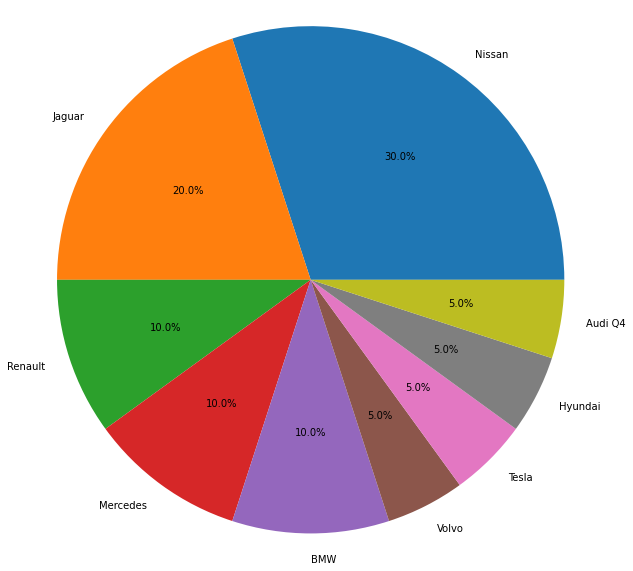

In [15]:
# Plot the population brand in a pie chart

# Values of each group
plt.figure(figsize=(10, 10))

brand_values = aggregator.simulation_dataframes['population']['brand'].value_counts()
plt.pie(brand_values, labels=brand_values.index, autopct='%1.1f%%')

# View the plot
plt.axis('equal')
plt.show()

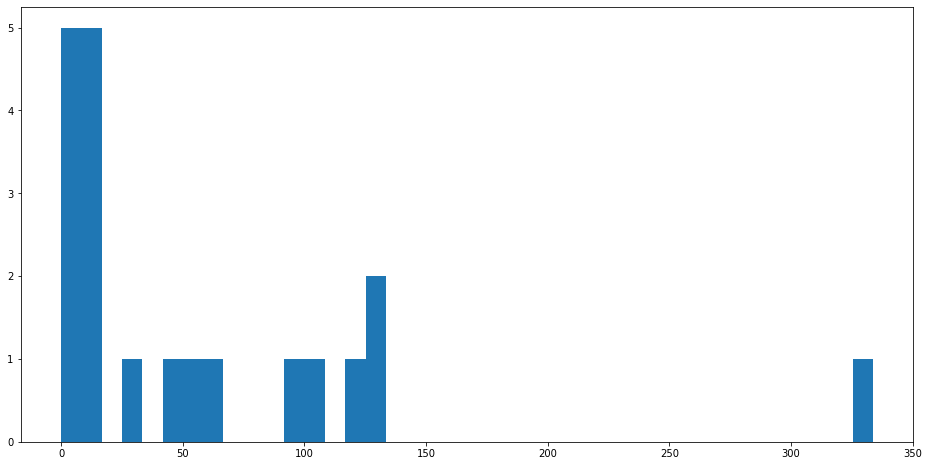

In [16]:
# Plot the trip distances in a histogram

plt.figure(figsize=(16, 8))

plt.hist(aggregator.simulation_dataframes['assigned_trips']['trip_length'], bins=40)
plt.show()

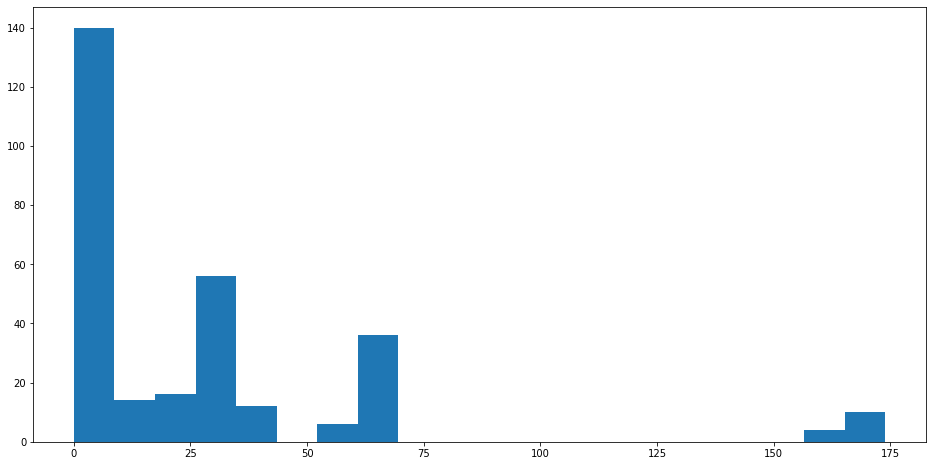

In [17]:
# Plot the segment distances in a histogram

plt.figure(figsize=(16, 8))

plt.hist(aggregator.simulation_dataframes['assigned_segments']['trip_length'], bins=20)
plt.show()

In [18]:
# Average trip distance

aggregator.simulation_dataframes['assigned_trips']['trip_length'].mean()

58.91000000000001

In [19]:
# EV charging history

aggregator.simulation_dataframes['cs_history']

,start_time,end_time,start_soc,end_soc,ev_id,station_type,station_power
0,2023-01-01 18:31:00.295729,2023-01-01 20:09:22.394494,0.909968,0.990997,06aff8a0aacde61d7d4187cc27f4ae8d,Residential Slow (3.6 kW),3.6
1,2023-01-02 18:34:00.296972,2023-01-02 18:43:52.605614,0.990965,0.999096,06aff8a0aacde61d7d4187cc27f4ae8d,Residential Slow (3.6 kW),3.6
2,2023-01-03 18:34:00.303901,2023-01-03 18:35:01.633531,0.999064,0.999906,06aff8a0aacde61d7d4187cc27f4ae8d,Residential Slow (3.6 kW),3.6
3,2023-01-04 18:26:00.300666,2023-01-04 18:26:08.532394,0.999874,0.999987,06aff8a0aacde61d7d4187cc27f4ae8d,Residential Slow (3.6 kW),3.6
4,2023-01-05 18:35:00.298069,2023-01-05 18:35:03.220007,0.999955,0.999996,06aff8a0aacde61d7d4187cc27f4ae8d,Residential Slow (3.6 kW),3.6
...,...,...,...,...,...,...,...
165,2023-01-02 18:31:48.736467,2023-01-02 18:44:06.057455,0.974477,0.997448,4881909a4b340c32d84e2955cde702da,Residential Slow (7.2 kW),7.2
166,2023-01-03 18:29:50.475228,2023-01-03 18:37:29.330784,0.984117,0.998412,4881909a4b340c32d84e2955cde702da,Residential Slow (7.2 kW),7.2
167,2023-01-04 18:32:52.668605,2023-01-04 18:40:06.825765,0.984971,0.998497,4881909a4b340c32d84e2955cde702da,Residential Slow (7.2 kW),7.2
168,2023-01-05 18:26:49.700742,2023-01-05 18:33:56.141149,0.985239,0.998524,4881909a4b340c32d84e2955cde702da,Residential Slow (7.2 kW),7.2


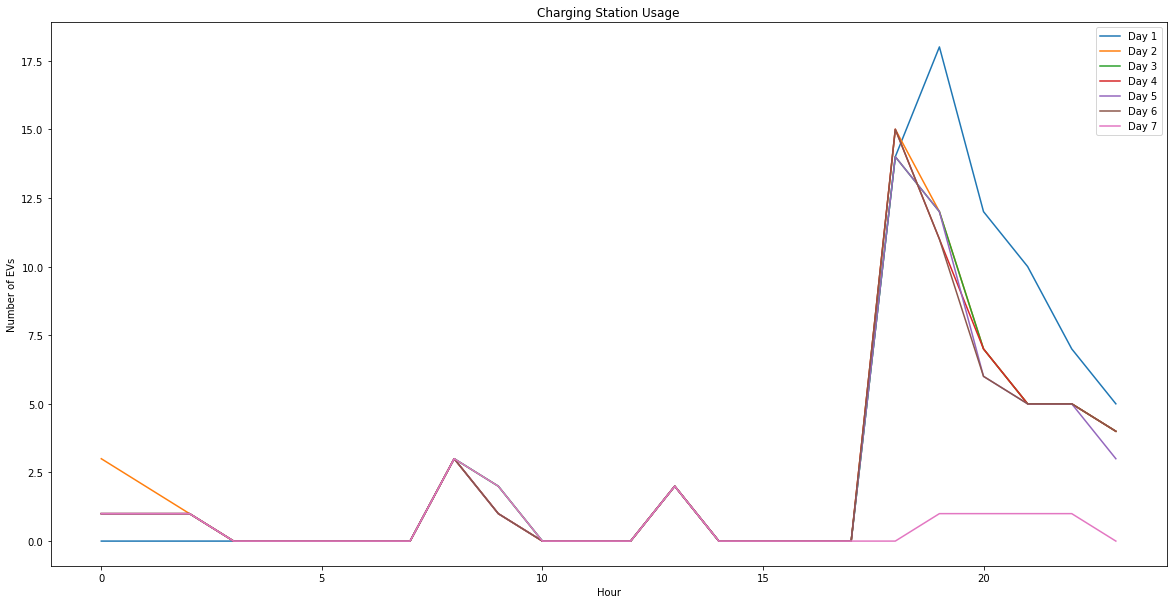

In [22]:
# Charging Station usage
# Pick a Day. If None, every day is plotted

DAY = None

# Create a figure
fig = plt.figure(figsize=(20, 10))

# Plot the data
if DAY is not None:
    plt.plot(np.sum(aggregator.simulation_dataframes['ev_charging_history'].transpose().loc[DAY].transpose() > 0, axis=0).ravel())
else:
    for i in range(1, aggregator.simulation_cycles + 1):
        plt.plot(np.sum(aggregator.simulation_dataframes['ev_charging_history'].transpose().loc['2023-01-{:02d}'.format(i)].transpose() > 0, axis=0).ravel())

# Set the title
plt.title('Charging Station Usage')

# Set the x-axis label
plt.xlabel('Hour')

# Set the y-axis label
plt.ylabel('Number of EVs')

# Set the legend
if DAY is not None:
    plt.legend(['Day {}'.format(DAY)])
else:
    plt.legend(['Day {}'.format(i) for i in range(1, len(aggregator.simulation_dataframes) + 1)])

plt.show()

In [23]:
aggregator.simulation_dataframes['ev_charging_type']

,2023-01-01 00:00:00,2023-01-01 01:00:00,2023-01-01 02:00:00,2023-01-01 03:00:00,2023-01-01 04:00:00,2023-01-01 05:00:00,2023-01-01 06:00:00,2023-01-01 07:00:00,2023-01-01 08:00:00,2023-01-01 09:00:00,...,2023-01-07 14:00:00,2023-01-07 15:00:00,2023-01-07 16:00:00,2023-01-07 17:00:00,2023-01-07 18:00:00,2023-01-07 19:00:00,2023-01-07 20:00:00,2023-01-07 21:00:00,2023-01-07 22:00:00,2023-01-07 23:00:00
06aff8a0aacde61d7d4187cc27f4ae8d,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
dff4c06008604f528a2884f97ccad3a0,0,0,0,0,0,0,0,0,Private Semi-fast (22 kW),0,...,0,0,0,0,0,0,0,0,0,0
fc7908ad4485434129ce84691691b39c,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
92e6ef29c5eb156d584ec54c50ea42c4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
938f52be04630e0cb449148a6d07093c,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
e55ef27688137f7c33879909f4f41b78,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,Public Fast (50 kW),Public Fast (50 kW),Public Fast (50 kW),0
2431cd540cd7ec7e8491f0e6a2f53223,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4563146b787f6f6a509de456a4f18b5d,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36aa45650919461a8c397b1f607852e1,0,0,0,0,0,0,0,0,Public Fast (50 kW),Public Fast (50 kW),...,0,0,0,0,0,Public Fast (50 kW),0,0,0,0
1edea7e1f7b0f8be4ab2de7c86e8bd81,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


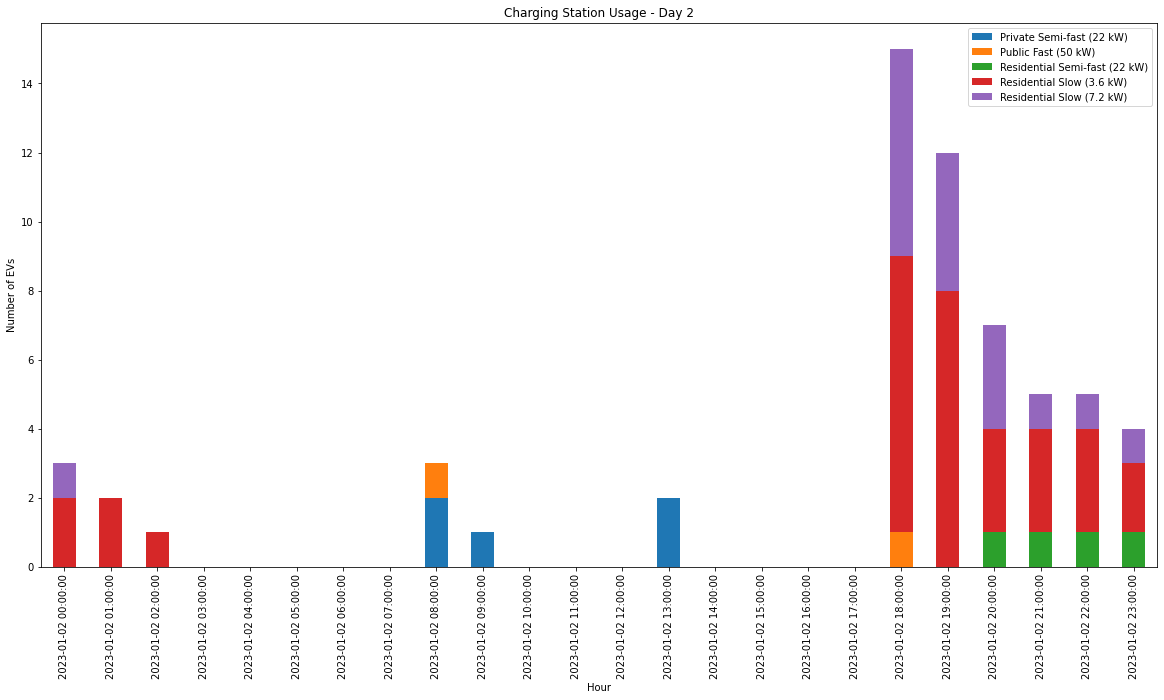

In [26]:
# Plot a stacked bar chart of the ev_charging_history_type_hourly DataFrame

DAY = 2

# Get the value counts of each charging type at each hour
ev_charging_history_type_hourly_value_counts = aggregator.simulation_dataframes['ev_charging_type'].transpose().loc['2023-01-{:02d}'.format(DAY)].transpose().apply(pd.value_counts, axis=0)
ev_charging_history_type_hourly_value_counts.drop(0, inplace=True)
ev_charging_history_type_hourly_value_counts = ev_charging_history_type_hourly_value_counts.fillna(0)

# Plot the data
ev_charging_history_type_hourly_value_counts.transpose().plot(kind='bar', stacked=True, figsize=(20, 10))

# Set the title
plt.title('Charging Station Usage - Day {}'.format(DAY))

# Set the x-axis label
plt.xlabel('Hour')

# Set the y-axis label
plt.ylabel('Number of EVs')

plt.show()

In [27]:
# EV Stopped History

aggregator.simulation_dataframes['ev_stopped']

,2023-01-01 00:00:00,2023-01-01 01:00:00,2023-01-01 02:00:00,2023-01-01 03:00:00,2023-01-01 04:00:00,2023-01-01 05:00:00,2023-01-01 06:00:00,2023-01-01 07:00:00,2023-01-01 08:00:00,2023-01-01 09:00:00,...,2023-01-07 14:00:00,2023-01-07 15:00:00,2023-01-07 16:00:00,2023-01-07 17:00:00,2023-01-07 18:00:00,2023-01-07 19:00:00,2023-01-07 20:00:00,2023-01-07 21:00:00,2023-01-07 22:00:00,2023-01-07 23:00:00
06aff8a0aacde61d7d4187cc27f4ae8d,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
dff4c06008604f528a2884f97ccad3a0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
fc7908ad4485434129ce84691691b39c,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
92e6ef29c5eb156d584ec54c50ea42c4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
938f52be04630e0cb449148a6d07093c,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
e55ef27688137f7c33879909f4f41b78,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,0
2431cd540cd7ec7e8491f0e6a2f53223,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4563146b787f6f6a509de456a4f18b5d,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36aa45650919461a8c397b1f607852e1,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0
1edea7e1f7b0f8be4ab2de7c86e8bd81,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# Check when the EVs are stopped

stopped_df = aggregator.simulation_dataframes['ev_stopped'].apply(pd.value_counts, axis=0)
stopped_df.fillna(0, inplace=True)
stopped_df = stopped_df.transpose()
stopped_df.columns = ['Driving', 'Stopped']

stopped_df

,Driving,Stopped
2023-01-01 00:00:00,20.0,0.0
2023-01-01 01:00:00,20.0,0.0
2023-01-01 02:00:00,20.0,0.0
2023-01-01 03:00:00,20.0,0.0
2023-01-01 04:00:00,20.0,0.0
...,...,...
2023-01-07 19:00:00,19.0,1.0
2023-01-07 20:00:00,19.0,1.0
2023-01-07 21:00:00,19.0,1.0
2023-01-07 22:00:00,19.0,1.0


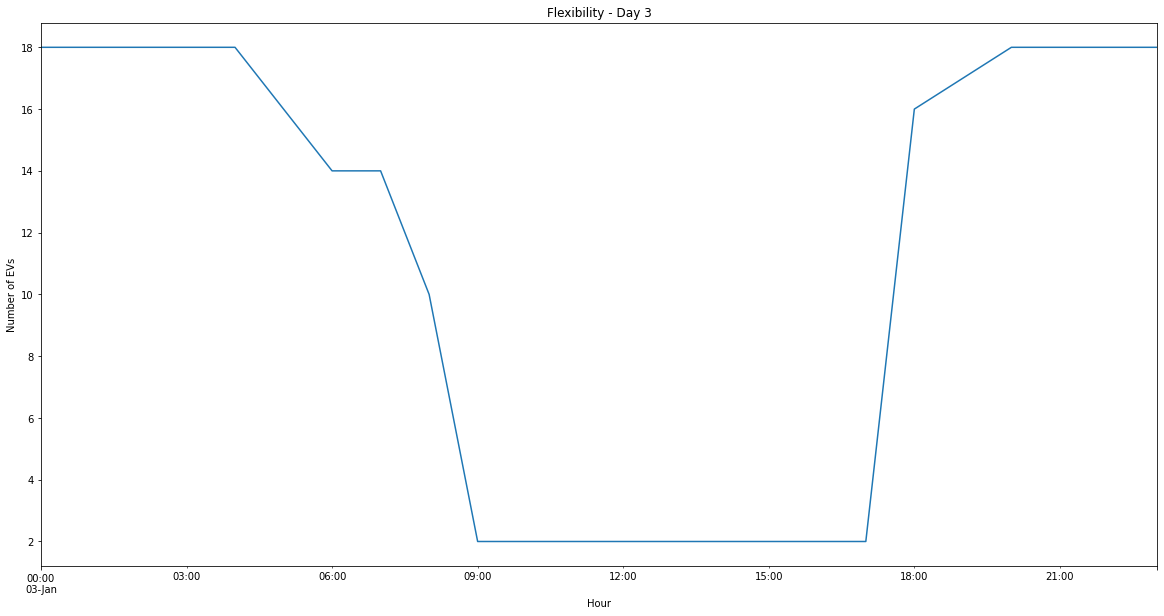

In [29]:
# Plot a stacked bar chart of the ev_stopped DataFrame

DAY = 3

plt.figure(figsize=(20, 10))

# Get the value counts of each charging type at each hour
np.sum(aggregator.simulation_dataframes['ev_flexibility'].transpose().loc['2023-01-{:02d}'.format(DAY)], axis=1).plot()

# Set the title
plt.title('Flexibility - Day {}'.format(DAY))

# Set the x-axis label
plt.xlabel('Hour')

# Set the y-axis label
plt.ylabel('Number of EVs')

# Set the y-axis to an integer
#plt.yticks(np.arange(0, aggregator.number_of_evs))

plt.show()

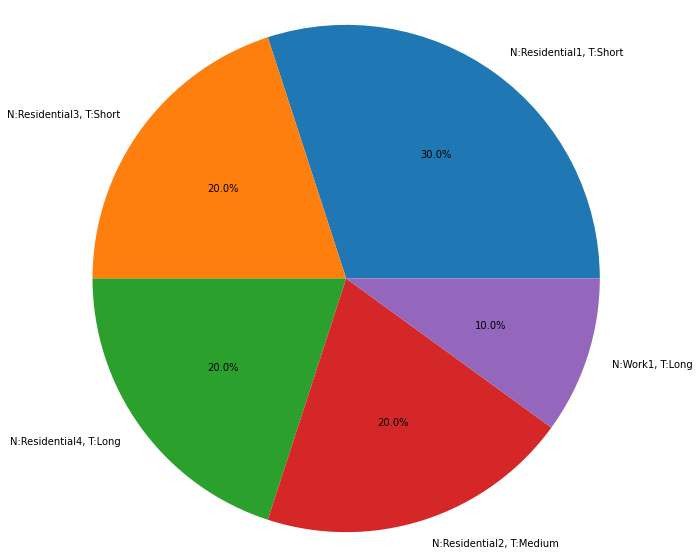

In [30]:
# Plot a pie chart of the user profiles

plt.figure(figsize=(10, 10))

# Values of each group
profile_values = aggregator.simulation_dataframes['population']['user_profile'].value_counts()
plt.pie(profile_values, labels=profile_values.index, autopct='%1.1f%%')

# View the plot
plt.axis('equal')

plt.show()

In [31]:
# Flexibility power

aggregator.simulation_dataframes['ev_flexibility_power']

,2023-01-01 00:00:00,2023-01-01 01:00:00,2023-01-01 02:00:00,2023-01-01 03:00:00,2023-01-01 04:00:00,2023-01-01 05:00:00,2023-01-01 06:00:00,2023-01-01 07:00:00,2023-01-01 08:00:00,2023-01-01 09:00:00,...,2023-01-07 14:00:00,2023-01-07 15:00:00,2023-01-07 16:00:00,2023-01-07 17:00:00,2023-01-07 18:00:00,2023-01-07 19:00:00,2023-01-07 20:00:00,2023-01-07 21:00:00,2023-01-07 22:00:00,2023-01-07 23:00:00
06aff8a0aacde61d7d4187cc27f4ae8d,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
dff4c06008604f528a2884f97ccad3a0,0,0,0,0,0,0,0,0,22,22,...,22,22,22,22,22,0,0,0,0,0
fc7908ad4485434129ce84691691b39c,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
92e6ef29c5eb156d584ec54c50ea42c4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
938f52be04630e0cb449148a6d07093c,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
e55ef27688137f7c33879909f4f41b78,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2431cd540cd7ec7e8491f0e6a2f53223,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4563146b787f6f6a509de456a4f18b5d,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36aa45650919461a8c397b1f607852e1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1edea7e1f7b0f8be4ab2de7c86e8bd81,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
# Save all the simulation dataframes to a individual CSV files

import os

# Create the directory
if not os.path.exists('simulation_dataframes'):
    os.makedirs('simulation_dataframes')

for current_df in aggregator.simulation_dataframes.keys():
    aggregator.simulation_dataframes[current_df].to_csv('simulation_dataframes/{}_{}.csv'.format(current_df, aggregator.simulation_cycles))